In [17]:
import requests
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
plt.close("all")

# Define the API URL
URL = "https://api.datacite.org/dois"

# Define the query parameters
params = {
    "prefix": "10.25798",
    "page[number]": 1,
    "page[size]": 1000
}


# Initialize lists to store data
dois = []
# List of subject entries, with sublist per DOI
subjects_grouped = []
# Flat list of all subject entries
subjects_total = []
# Flat list of all FOS entries
fos_total = []


# Check if string already is in list of strings, independent of capitalization. Return None (no dublicate) if list is empty
def check_for_dublicate (list, string):
    try:
        for j in range(len(list)):
            if list[j].lower() != string.lower():
                pass
            else: 
                return True
    except ValueError:
        return None

# Fetch n pages of API-response and collect specific entries in "data" from single DOIs
def fetch_data():    
    response = requests.get(URL, params=params)
    antwort = response.json()
    
    for item in antwort["data"]:
        attributes = item["attributes"]
        dois.append(attributes["doi"])
        
        # Collect entries "subject" from field "subjects"
        
        eintrag_subjects_item = (attributes["subjects"])
        schlagwoerter_item = []
        # In case no subject is given: attributes["subjects"] == [], the following then is "for i in range(0, 0)" and not executed => no index error
        for i in range(len(eintrag_subjects_item)):
            schlagwort = eintrag_subjects_item[i]["subject"]
            if check_for_dublicate(schlagwoerter_item, schlagwort) == None:
                # Capitalize freetext entries to avoid splitting of subject count due to inconsistent capitalization 
                if schlagwort[:4] != "FOS:":
                    schlagwort = schlagwort.capitalize()
                schlagwoerter_item.append(schlagwort)
                subjects_total.append(schlagwort)
                if schlagwort[:4] == "FOS:":
                    fos_total.append(schlagwort)
        subjects_grouped.append(schlagwoerter_item)
        
    return antwort["links"].get("next")

#while params["page[number]"] < 3: 
while True:
    next_page = fetch_data()
    # Check if there is a next page to fetch, if yes, count up page number of query
    if next_page == None:
        break
    else: 
        params["page[number]"] += 1


# Calculate percentage of metadata sets with subject entry missing

no_subject_entry = 0
for i in range(len(subjects_grouped)):
    if subjects_grouped[i] == []:
        no_subject_entry +=1
number_dois = len(subjects_grouped)
perc_no_subject = round(((no_subject_entry / number_dois) * 100), 2)
print(number_dois, no_subject_entry)

# Print percentage
print(f"Percentage of subject entry missing: {perc_no_subject}")

5214 2280
Percentage of subject entry missing: 43.73


In [18]:
# Generate statistic of subject entries
df_subjects = pd.DataFrame({
    "Subject": subjects_total
})

subject_counts = df_subjects["Subject"].value_counts()
# Print the statistic
print("Statistic of subjects:")
print(subject_counts)
        

Statistic of subjects:
Subject
FOS: Computer and information sciences                                          1061
FOS: Civil engineering                                                           966
FOS: Electrical engineering, electronic engineering, information engineering     216
FOS: Physical sciences                                                           143
FOS: Chemical sciences                                                           122
FOS: Engineering and technology                                                  103
FOS: Mathematics                                                                  74
FOS: Media and communications                                                     60
FOS: Earth and related environmental sciences                                     45
Mobility research                                                                 38
FOS: Mechanical engineering                                                       35
FOS: Educational sciences         

In [19]:
# Generate statistic of FOS entries only
df_fos = pd.DataFrame({
    "FoS": fos_total
})

fos_counts = df_fos["FoS"].value_counts()
# Print the statistic
print("Statistic of FoS:")
print(fos_counts)


Statistic of FoS:
FoS
FOS: Computer and information sciences                                          1061
FOS: Civil engineering                                                           966
FOS: Electrical engineering, electronic engineering, information engineering     216
FOS: Physical sciences                                                           143
FOS: Chemical sciences                                                           122
FOS: Engineering and technology                                                  103
FOS: Mathematics                                                                  74
FOS: Media and communications                                                     60
FOS: Earth and related environmental sciences                                     45
FOS: Mechanical engineering                                                       35
FOS: Educational sciences                                                         34
FOS: Humanities                            

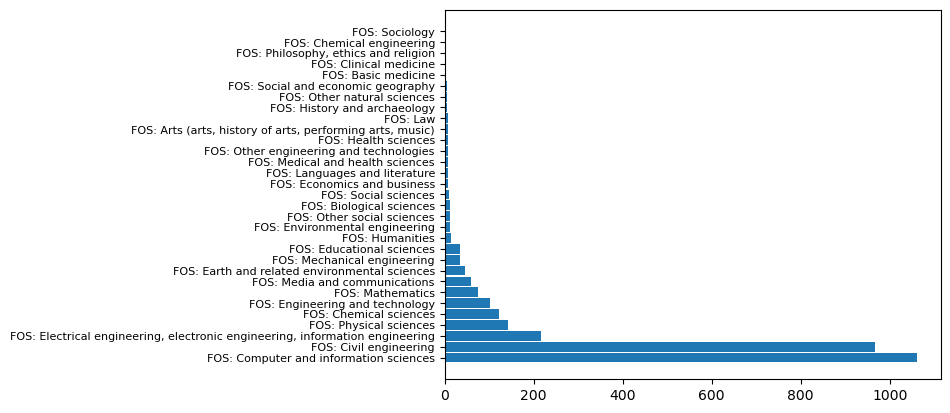

'\n# Plot as bar chart with exact values displayed - maybe does not make much sense in context of presentation, since exact numbers constantly changing\nfig, ax = plt.subplots()\nbars = ax.barh(list(test.keys()), list(test.values()))\nax.bar_label(bars)\n'

In [20]:
# Transform pandas series to dict to generate plot directly in matplotlib
test = fos_counts.to_dict()

# Plot as bar chart
plt.barh(range(len(test)), list(test.values()), height=0.9)
plt.yticks(range(len(test)), list(test.keys()), fontsize=8)
plt.show()

"""
# Plot as bar chart with exact values displayed - maybe does not make much sense in context of presentation, since exact numbers constantly changing
fig, ax = plt.subplots()
bars = ax.barh(list(test.keys()), list(test.values()))
ax.bar_label(bars)
"""


In [21]:
# Create a DataFrame from the extracted data per DOI

# Untrancate list - does not work with broad columns
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)
#pd.set_option('display.width', 4000)

df = pd.DataFrame({
    "DOI": dois,
    "Subject": subjects_grouped
})


In [22]:
print(df)

                     DOI                                            Subject
0     10.25798/s1v2-2d66                           [FOS: Civil engineering]
1     10.25798/fyng-1519                           [FOS: Civil engineering]
2     10.25798/ek0p-1254                           [FOS: Civil engineering]
3     10.25798/s1zq-1g71                           [FOS: Civil engineering]
4     10.25798/d6ds-kh83                           [FOS: Civil engineering]
5     10.25798/k2vb-z562                           [FOS: Civil engineering]
6     10.25798/swvj-my59                           [FOS: Civil engineering]
7     10.25798/h0xz-7p80                           [FOS: Civil engineering]
8     10.25798/x22w-bx97                           [FOS: Civil engineering]
9     10.25798/dw0g-rt33                           [FOS: Civil engineering]
10    10.25798/y4da-h954                           [FOS: Civil engineering]
11    10.25798/7zq3-ed22                           [FOS: Civil engineering]
12    10.257